# **Assignment-7**

In [1]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt
import math as m
import warnings
import pandas as pd
import pywt 
import io
from PIL import Image, ImageFilter 
import skimage.filters
import numpy as np
import cmath
import cv2
import skimage.filters
from scipy.signal.signaltools import wiener
warnings.filterwarnings("ignore")

# 1. Analog filters:

__1--> Consider a RC circuit with input voltage Vi = 10V applied to the
series RC and output Vo taken from the ends of C with R = 47kΩ
and C = 47nF. Find the transfer function of the circuit and plot
the frequency and magnitude spectrum. Which kind of filter is this?
Prove your claim by putting in the frequency as 100Hz and 10000Hz
and finding the values of Vo. Find the cutoff frequency and verify that
the behaviour is justified.__

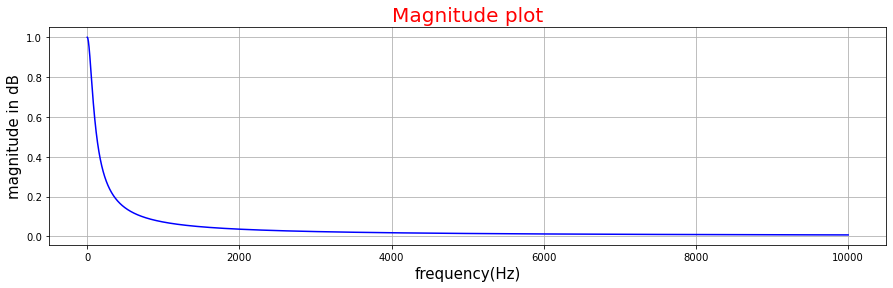

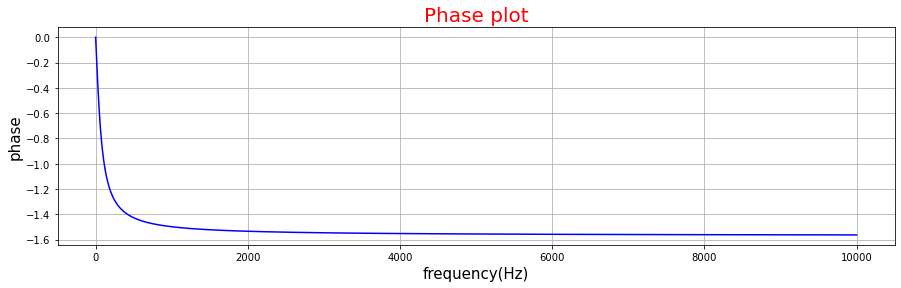

from the above plots it is a low pass filter
Vo at 100 Hz = 5.8843 volt
Vo at 10000 Hz = 0.07205 volt


In [2]:
R=47*pow(10,3)
C=47*pow(10,-9)
f=np.arange(0,10000,1)
Vi = 10
H=[1/complex(1,2*np.pi*i*R*C) for i in f]
magnitude=[abs(i) for i in H]
phase=[cmath.phase(i) for i in H]
#magnitude plot
plt.figure(figsize=(15,4))
plt.plot(f,magnitude,c='b')
plt.title("Magnitude plot",c='r',size=20)
plt.xlabel("frequency(Hz)",size=15)
plt.ylabel("magnitude in dB",size=15)
plt.grid()
plt.show()
#phase plot
plt.figure(figsize=(15,4))
plt.plot(f,phase,c='b')
plt.grid()
plt.title("Phase plot",c='r',size=20)
plt.xlabel("frequency(Hz)",size=15)
plt.ylabel("phase",size=15)
plt.show()
print("from the above plots it is a low pass filter")
print("Vo at 100 Hz =",np.round(np.abs(H[99])*Vi,5) ,"volt")
print("Vo at 10000 Hz =",np.round(np.abs(H[9999])*Vi,5),"volt")

__2-->Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour of
the transfer function? Find the transfer function of the circuit and
plot the frequency and magnitude spectrum. Which kind of filter is
this? Prove your claim by putting in the frequency as 100Hz and
10000Hz and finding the values of Vo. Find the cutoff frequency and
verify that the behaviour is justified.__

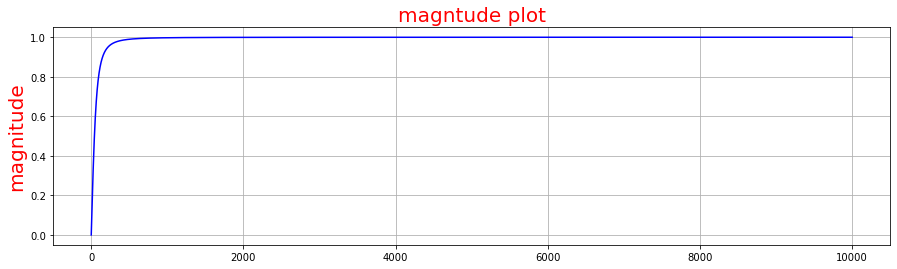

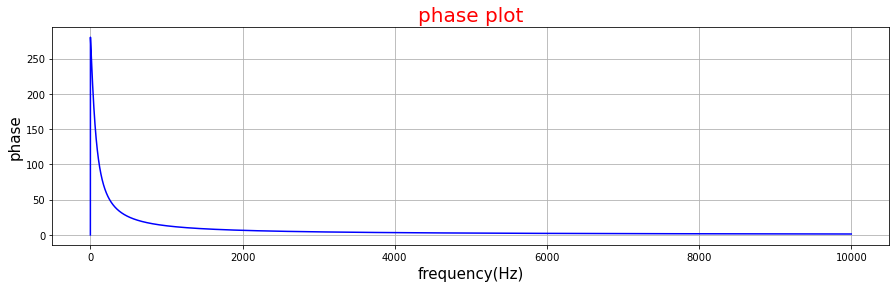

from the above plots it is a high pass filter
Vo at 100 Hz = 8.0 3
Vo at 10000 Hz = 10.0 3


In [3]:
H=[complex(0,2*np.pi*i*R*C)/(complex(1,2*np.pi*R*i*C)) for i in f]
magnitude=[abs(i) for i in H]
phase=[180*(cmath.phase(i)) for i in H]
plt.figure(figsize=(15,4))
plt.plot(f,magnitude,c='b')
plt.grid()
plt.title("magntude plot",size=20,c='r')
plt.ylabel("magnitude",size=20,c='r')
plt.show()
plt.figure(figsize=(15,4))
plt.plot(f,phase,c='b')
plt.grid()
plt.title("phase plot",c='r',size=20)
plt.xlabel("frequency(Hz)",size=15)
plt.ylabel("phase",size=15)
plt.show()
print("from the above plots it is a high pass filter")
print("Vo at 100 Hz =",np.round(np.abs(H[99])*Vi),3)
print("Vo at 10000 Hz =",np.round(np.abs(H[9999])*Vi),3)

__3-->Design a second order low pass filter using RC circuit. Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is
10 sin 2πt. Plot the amplitude and frequency spectrum__

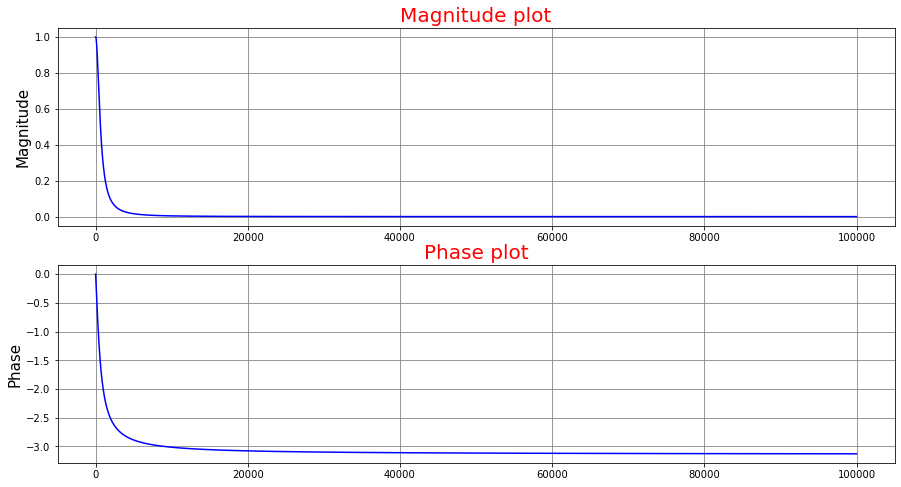

In [4]:
R = 50000
C = 50*pow(10,-9)
f = np.arange(0,10000,0.1)
H_f = ((1/(R*C))/((1j)*(2*np.pi*f) + 1/(R*C)))**2
phase = [cmath.phase(i) for i in H_f]
fig = plt.figure(1,figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(abs(H_f),c='b')
plt.grid(color="gray")
plt.ylabel("Magnitude",size='15')
plt.title("Magnitude plot",c='r',size=20)
plt.subplot(2,1,2)
plt.plot(phase,c='b')
plt.grid(color="gray")
plt.ylabel("Phase",size='15')
plt.title("Phase plot",c='r',size=20)
plt.show()

__4-->Design a band pass filter using cascaded RC circuits. Make use of
the values of the 2 resistors as 20KΩ. The filter should pass all the
frequencies between 1kHz and 30kHz. Find the transfer function of
the same and plot the magnitude and amplitude of the filter.__

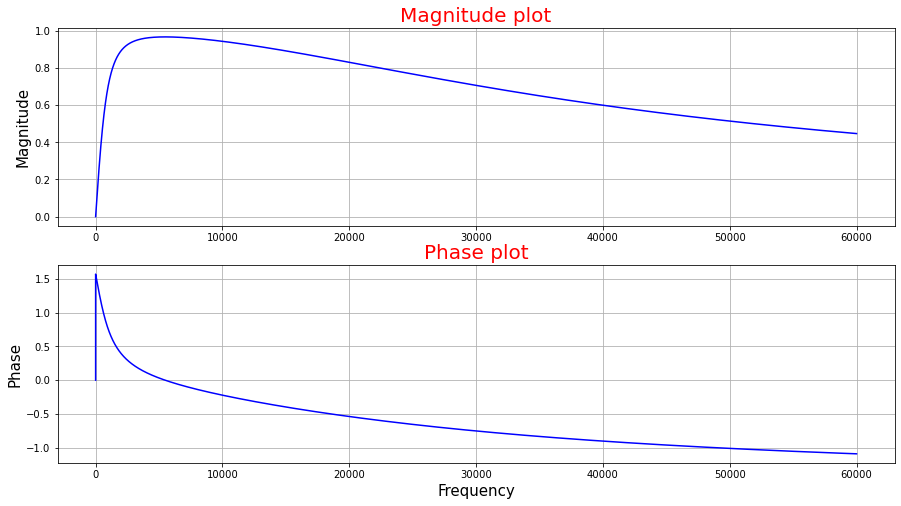

In [5]:
fl = 1 *(10**3)
fh = 30 *(10**3)
R = 20 *(10**3)
C1 = 1/(2*np.pi*R*fl)
C2 = 1/(2*np.pi*R*fh)
f = np.arange(0,60000,0.01)
#transfer function
highpass_H = ((1j)*(2*np.pi*f))/((1j)*(2*np.pi*f) + 1/(R*C1))
lowpass_H = (1/(R*C2))/((1j)*(2*np.pi*f) + 1/(R*C2))
bandpass_H = highpass_H*lowpass_H
magnitude_spectrum = abs(bandpass_H)
phase_spectrum = np.angle(bandpass_H)
#magnitude spectrum
plt.figure(figsize = (15,8))
plt.subplot(2,1,1) 
plt.ylabel("Magnitude",size=15)
plt.title("Magnitude plot",c='r',size=20)
plt.plot(f,magnitude_spectrum,c='b') 
plt.grid()
#phase spectrum
plt.subplot(2,1,2)
plt.xlabel("Frequency",size=15)
plt.ylabel("Phase",size=15)
plt.title("Phase plot",c='r',size=20)
plt.plot(f,phase_spectrum,c='b') 
plt.grid()

# 2. Digital filters

__1-->Consider the difference equation:
y[n] = x[n] + x[n − 1]
Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
What kind of filter is this? Compute the transfer function to plot.the frequency and amplitude plots to verify your claim. Consider the
sinusoidal input to the filter with unit amplitude. Take the sampling
rate to be 1 Hz. Find and plot the filter output__


output of the system to the sequence x[n] is =  [ 3.  5.  7.  9. 11. 13. 15. 17. 19.]

----It is a low pass filter----


<StemContainer object of 3 artists>

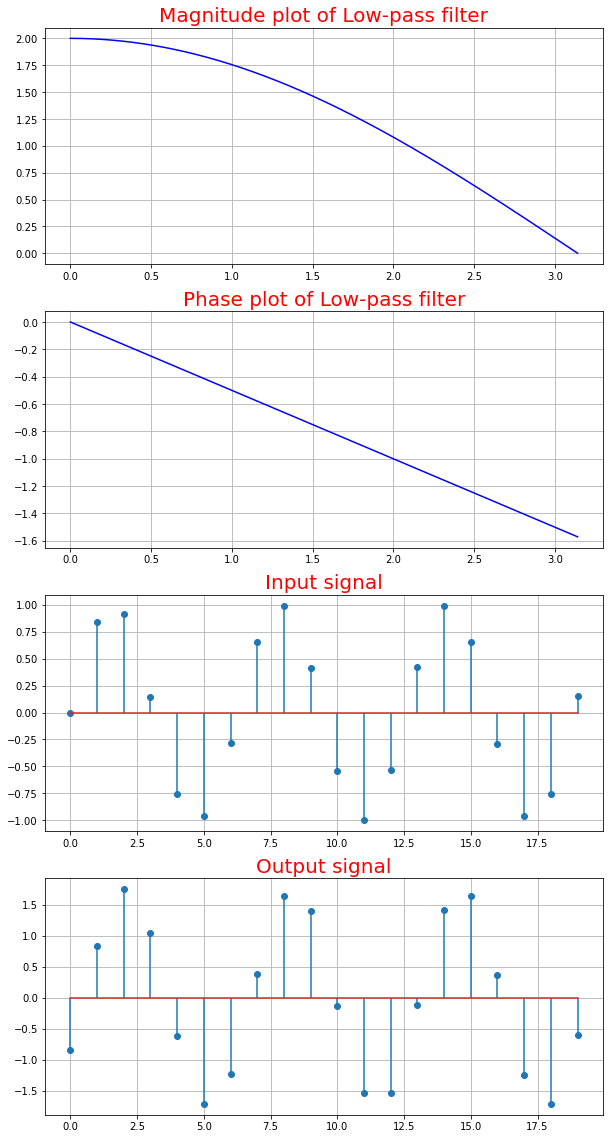

In [6]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n = np.arange(0,20,1)
y = np.zeros(len(x)-1)
w = np.arange(0,np.pi,0.001)
#we find the output sequence
for i in range(1,len(x)):
    y[i-1] = x[i] + x[i-1]
print("output of the system to the sequence x[n] is = ",y)
print("\n----It is a low pass filter----")
magnitude_H = 2*abs(np.cos(w/2))
phase_H = np.arctan(np.sin(w)/(1+np.cos(w))) - w
input_signal = np.sin(n)
magnitude_gain = 2*abs(np.cos(1/2))
phase_gain = np.arctan(np.sin(1)/(1+np.cos(1))) - 1
output_signal = magnitude_gain*np.sin(n+phase_gain)
plt.figure(1,figsize=(10,20))
#magnitude plot
plt.subplot(4,1,1)
plt.title("Magnitude plot of Low-pass filter",size=20,c='r')
plt.grid()
plt.plot(w,magnitude_H,c='b')
#phase plot
plt.subplot(4,1,2)
plt.title("Phase plot of Low-pass filter",size=20,c='r')
plt.grid()
plt.plot(w,phase_H,c='b')
#input signal
plt.subplot(4,1,3)
plt.title("Input signal",size=20,c='r')
plt.grid()
plt.stem(n,input_signal,use_line_collection=True)
#output signal
plt.subplot(4,1,4)
plt.title("Output signal",size=20,c='r')
plt.grid()
plt.stem(n,output_signal,use_line_collection=True)

__2-->• Consider the difference equation:y[n] = 1/3(x[n] + x[n − 1] + x[n − 2])What is this filter called? Compute the transfer function to plot the
frequency and amplitude spectrum. What are the applications of this
filter? Improve the above filter by the differential equation:y[n] = 1/4(x[n])+ 1/2(x[n − 1]) + 1/4(x[n − 2])and again do the whole analysis.__



The filter for the difference equation:y[n] = 1/3(x[n] + x[n − 1] + x[n − 2]) is moving average filter

The filter for the difference equation :y[n] = 1/4(x[n])+ 1/2(x[n − 1]) + 1/4(x[n − 2]) is hanning filter


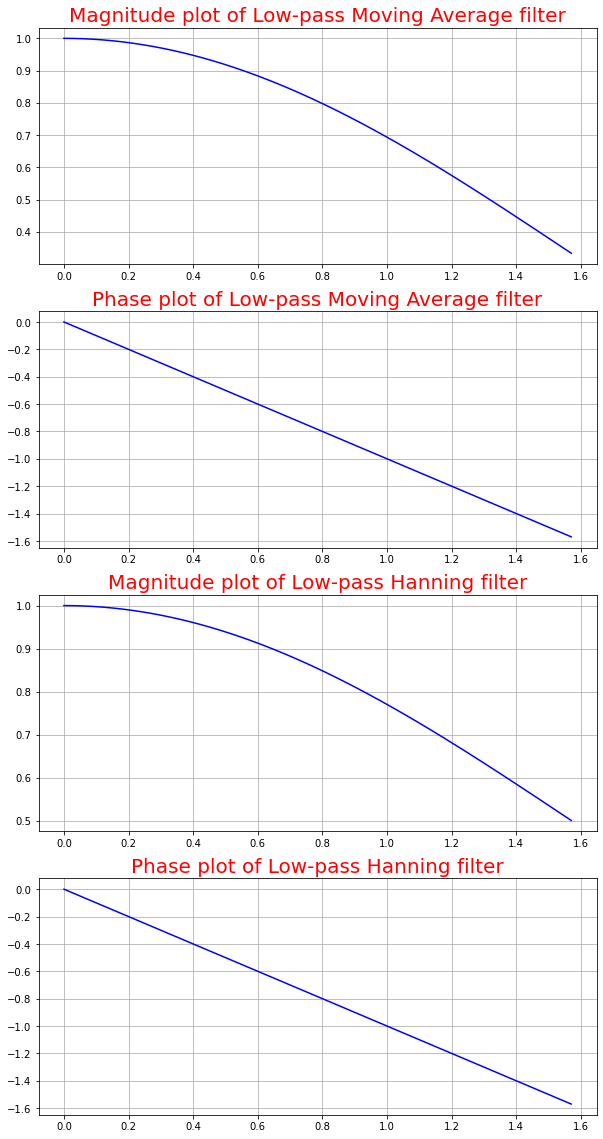

In [7]:
print("\nThe filter for the difference equation:y[n] = 1/3(x[n] + x[n − 1] + x[n − 2]) is moving average filter")
print("\nThe filter for the difference equation :y[n] = 1/4(x[n])+ 1/2(x[n − 1]) + 1/4(x[n − 2]) is hanning filter")
w = np.arange(0,np.pi/2,0.01)
H1 = 1/3*(1 + np.exp(-1j*w) + np.exp(-1j*2*w) )
magnitude_H1 = abs(H1)
phase_H1 = np.angle(H1)
H2 = 0.25 + 0.5*np.exp(-1j*w) + 0.25*np.exp(-1j*2*w)
magnitude_H2 = abs(H2)
phase_H2 = np.angle(H2)
fig = plt.figure(1,figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(w,magnitude_H1,c='b')
plt.title("Magnitude plot of Low-pass Moving Average filter",size=20,c='r')
plt.grid()
plt.subplot(4,1,2)
plt.plot(w,phase_H1,c='b')
plt.title("Phase plot of Low-pass Moving Average filter",size=20,c='r')
plt.grid()
plt.subplot(4,1,3)
plt.plot(w,magnitude_H2,c='b')
plt.title("Magnitude plot of Low-pass Hanning filter",size=20,c='r')
plt.grid()
plt.subplot(4,1,4)
plt.plot(w,phase_H2,c='b')
plt.title("Phase plot of Low-pass Hanning filter",size=20,c='r')
plt.grid()

__3-->Take any digital image of your choice and apply mean and median
filtering. What are the differences between the two? Take an image
and add speckle noise to it. Use a particular filter to remove this
noise. Take another image and add salt and pepper noise and again
use a particular filter to remove the noise. Plot the original images,
noisy images and images after noise removal respectively.__

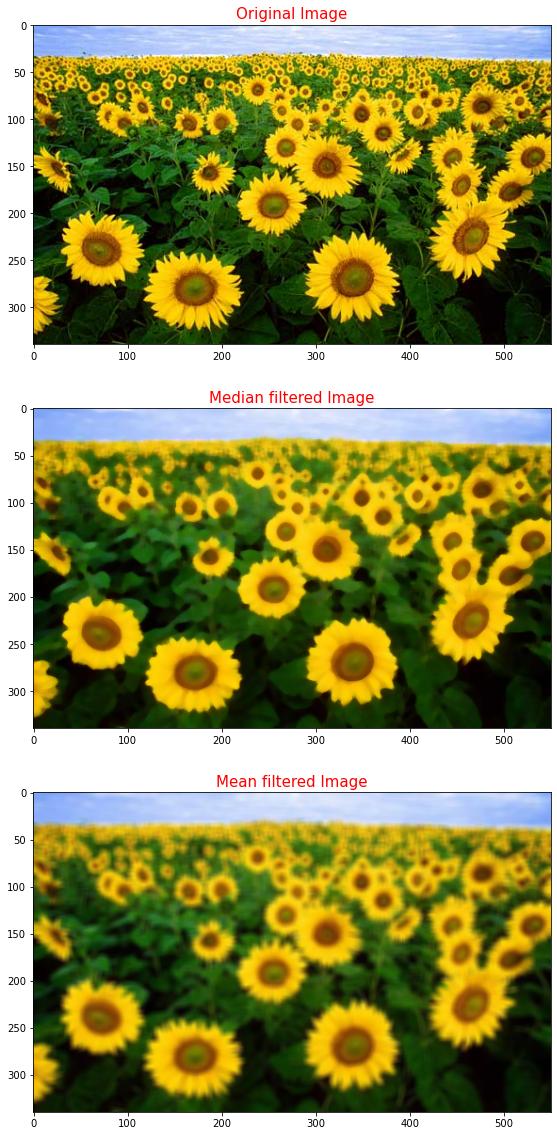

In [8]:
image= cv2.imread('sunflower.jpg')
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_PIL = Image.fromarray(np.uint8(image1))
fig = plt.figure(1,figsize=(20,20))
#plotting the original image
plt.subplot(3,1,1)
plt.title("Original Image",size=15,c='r')
plt.imshow(image_PIL)
# Median Filtering
img_median = image_PIL.filter(ImageFilter.MedianFilter(size = 7))
plt.subplot(3,1,2)
plt.title("Median filtered Image",size=15,c='r')
plt.imshow(img_median)
# Mean filtering
kernel = np.ones((7,7),np.float32)/49
img_mean = cv2.filter2D(image1,-1,kernel)
plt.subplot(3,1,3)
plt.title("Mean filtered Image",size=15,c='r')
plt.imshow(img_mean)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


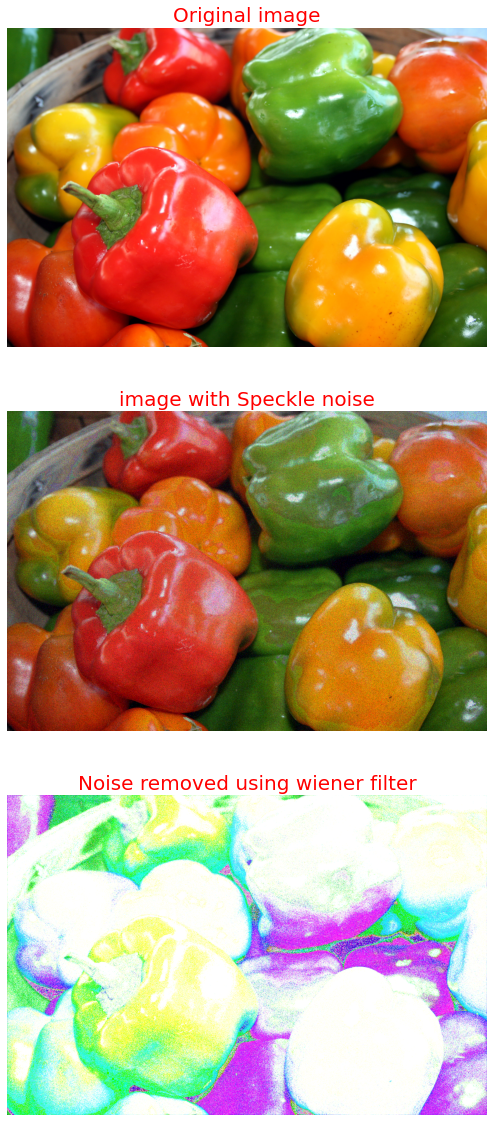

In [9]:
img = cv2.imread('pepper.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(np.uint8(img1))
gauss = np.random.normal(0,1,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')
img_speckle = img + img * gauss
filtered_img = wiener(img_speckle)
fig = plt.figure(1,figsize=(20,20))
plt.subplot(3,1,1)
plt.title("Original image",c='r',size=20)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,1,2)
plt.title("image with Speckle noise",c='r',size=20)
plt.imshow(img_speckle)
plt.axis('off')
plt.subplot(3,1,3)
plt.title("Noise removed using wiener filter",c='r',size=20)
plt.imshow(filtered_img)
plt.axis('off')
plt.show()

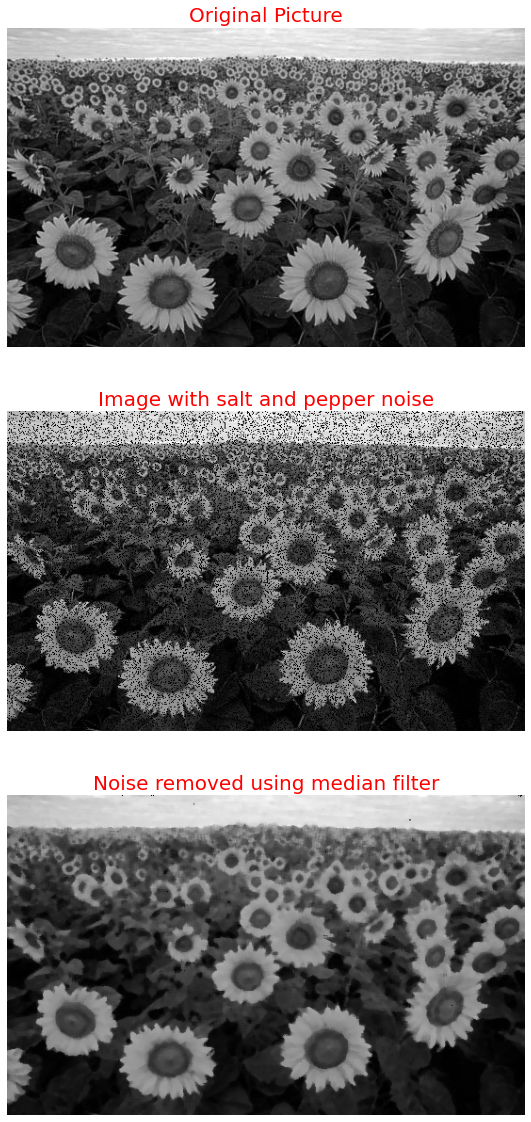

In [10]:
img = cv2.imread('sunflower.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 =  cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = Image.fromarray(np.uint8(img1))
fig = plt.figure(1,figsize=(15,20))
plt.subplot(3,1,1)
plt.title("Original Picture",c='r',size=20)
plt.imshow(img,cmap = 'gray')
plt.axis('off')
# Adding salt and pepper noise
s_vs_p = 0.5
amount = 0.2
num_salt = np.ceil(amount * img1.size * s_vs_p)
coords_salt = [np.random.randint(0, i - 1, int(num_salt)) for i in img1.shape]
img1[coords_salt] = 1
num_pepper = np.ceil(amount* img1.size * (1 - s_vs_p))
coords_pepper = [np.random.randint(0, i - 1, int(num_pepper)) for i in img1.shape]
img1[coords_pepper] = 0
plt.subplot(3,1,2)
plt.title("Image with salt and pepper noise",c='r',size=20)
plt.imshow(img1,cmap = 'gray')
plt.axis('off')
img_PIL = Image.fromarray(np.uint8(img1))
img_PIL_median = img_PIL.filter(ImageFilter.MedianFilter(size = 5))
plt.subplot(3,1,3)
plt.title("Noise removed using median filter",c='r',size=20)
plt.imshow(img_PIL_median,cmap='gray')
plt.axis('off')
plt.show()